# Constrained-Mechanical-Systems-Forward-Dynamic-Simulation-of-Fourbar
Multibody dynamics mideling and numerical methods

## 1 Explicit calculation of the Lagrange multiplier

In [1]:
import time
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Math
from Models.models import *

In [2]:
y = np.append([0, 0.5, np.pi/2, 1.8765, 1.692, 0.3533, 3.3765, 1.192, -1.8767], np.zeros(9))
Demo = ExplictModel(m=[1, 1, 1], l=[1, 4, 2.5, 3], 
                    potiential_field=[0, -9.81, 0, 0, -9.81, 0, 0, -9.81, 0], 
                    close_chain=True, 
                    external_input=[0, 0, 5, 0, 0, 0, 0, 0, 0], 
                    damping=None)

In [3]:
display(Markdown("System constrains:"))
constrains = Demo.constrains()
for item in constrains:
    display(sp.Eq(item, 0))

System constrains:

Eq(x_c1(t) - 0.5*cos(theta_1(t)), 0)

Eq(y_c1(t) - 0.5*sin(theta_1(t)), 0)

Eq(x_c2(t) - 1.0*cos(theta_1(t)) - 2.0*cos(theta_2(t)), 0)

Eq(y_c2(t) - 1.0*sin(theta_1(t)) - 2.0*sin(theta_2(t)), 0)

Eq(x_c3(t) - 1.0*cos(theta_1(t)) - 4.0*cos(theta_2(t)) - 1.25*cos(theta_3(t)), 0)

Eq(y_c3(t) - 1.0*sin(theta_1(t)) - 4.0*sin(theta_2(t)) - 1.25*sin(theta_3(t)), 0)

Eq(1.0*cos(theta_1(t)) + 4.0*cos(theta_2(t)) + 2.5*cos(theta_3(t)) - 3.0, 0)

Eq(1.0*sin(theta_1(t)) + 4.0*sin(theta_2(t)) + 2.5*sin(theta_3(t)), 0)

In [4]:
t0 = time.time()
sol = solve_ivp(Demo.sim, [0, 10], y, method='RK23')
print(time.time() - t0)

0.9298672676086426


In [2]:
Demo = ExplictModel(m=[1, 1], l=[1, 1], 
                    potiential_field=[0, -9.81, 0, 0, -9.81, 0], 
                    close_chain=False, 
                    external_input=None, 
                    damping=None)

In [3]:
display(Markdown("System constrains:"))
constrains = Demo.constrains()
for item in constrains:
    display(sp.Eq(item, 0))

System constrains:

Eq(x_c1(t) - 0.5*cos(theta_1(t)), 0)

Eq(y_c1(t) - 0.5*sin(theta_1(t)), 0)

Eq(x_c2(t) - cos(theta_1(t)) - 0.5*cos(theta_2(t)), 0)

Eq(y_c2(t) - sin(theta_1(t)) - 0.5*sin(theta_2(t)), 0)

In [4]:
y = np.append([1, 0, 0, 2, 0, 0], np.zeros(6))
sol = solve_ivp(Demo.sim, [0, 5], y, method='DOP853')
print(sol.y.shape)

(12, 43)


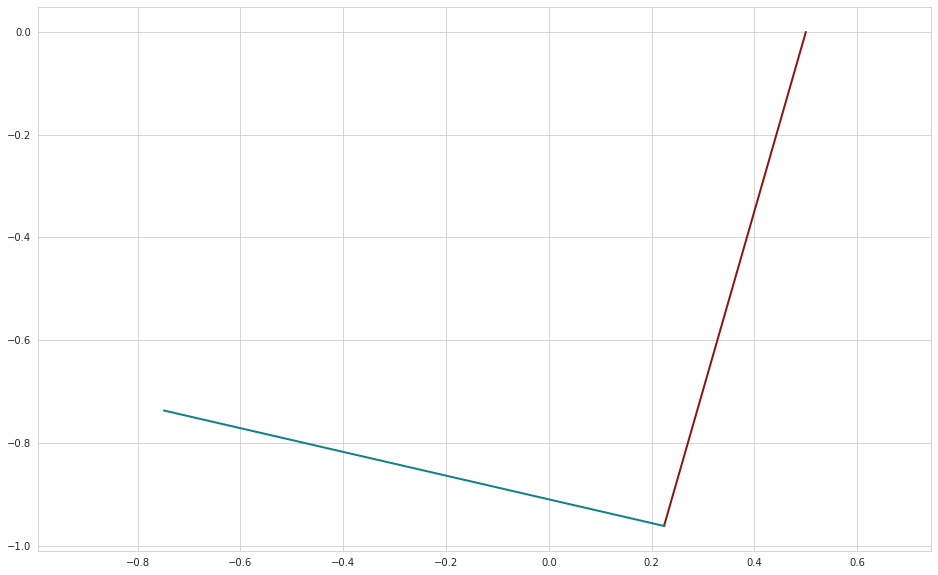

In [7]:
from utils.plot_solution import *
plot_solution(sol.y.T[15], n_rod=2, l=[1, 1], rot=None)

In [6]:
Demo.lagrangian()

Matrix([[lamda_1*(x_c1(t) - 0.5*cos(theta_1(t))) + lamda_2*(y_c1(t) - 0.5*sin(theta_1(t))) + lamda_3*(x_c2(t) - cos(theta_1(t)) - 0.5*cos(theta_2(t))) + lamda_4*(y_c2(t) - sin(theta_1(t)) - 0.5*sin(theta_2(t))) + 9.81*y_c1(t) + 9.81*y_c2(t) + 0.0416666666666667*Derivative(theta_1(t), t)**2 + 0.0416666666666667*Derivative(theta_2(t), t)**2 + 0.5*Derivative(x_c1(t), t)**2 + 0.5*Derivative(x_c2(t), t)**2 + 0.5*Derivative(y_c1(t), t)**2 + 0.5*Derivative(y_c2(t), t)**2]])